In [331]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

from tensorflow import keras

print(f'Keras:{keras.__version__}')  # version

Keras:2.11.0


In [332]:
dt_cifar10 = keras.datasets.cifar10

### Classes da Base *Cifar10*
```json
{
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}
```

In [333]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

### Carregendo a base para treinamento

In [334]:
(X_train_full, y_train_full), (X_test, y_test) = dt_cifar10.load_data()

### Detalhes e informações da Base de dados

In [335]:
print(f'Dataset shape:{X_train_full.shape}')

print(f'First instance shape:{X_train_full[0].shape}')
print(f'\nFirst instance:\n {X_train_full[0]}')

Dataset shape:(50000, 32, 32, 3)
First instance shape:(32, 32, 3)

First instance:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


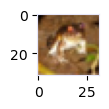

In [336]:
fig = plt.figure(figsize=(0.8, 0.8))
fig = plt.imshow(X_train_full[0], cmap=plt.cm.gray)
plt.show()

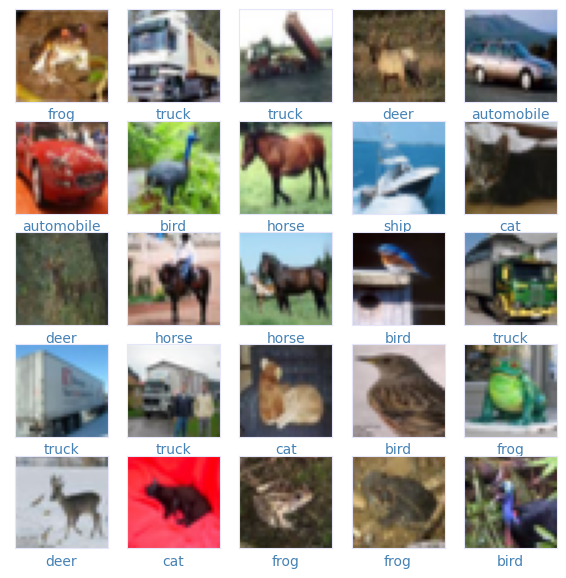

In [337]:
plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(7, 7))

for i in range(25):  # First 25 instances
    plt.subplot(5, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train_full[i], cmap=plt.cm.gray)

    plt.xlabel(class_names[y_train_full[i][0]], color='steelblue')

plt.show()

## Normalizando os dados da imagem

In [338]:
X_valid, X_train = X_train_full[:15000] / 255.0, X_train_full[15000:] / 255.0
y_valid, y_train = y_train_full[:15000], y_train_full[15000:]

print(X_train_full.shape)

(50000, 32, 32, 3)


## Criando o model com Keras

In [339]:
kernel = (2, 2)  # kernel size of 3x3
pool = (2, 2)  # pool size 2x2

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel, padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(64, kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### compilando o model com o optimizador Adam
- learning rate = *1e-3*
- loss *sparse_categorical_crossentropy*
- metrica *sparse_categorical_accuracy*

In [340]:
from keras.optimizers import Adam

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam(learning_rate=1e-3),
                metrics=['sparse_categorical_accuracy'])

In [341]:
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 conv2d_85 (Conv2D)          (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 16, 16, 64)        8256      
                                                                 
 conv2d_87 (Conv2D)          (None, 16, 16, 64)        16448     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

## treinando o Modelo

In [342]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    steps_per_epoch=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
100/100 [==============================] - 60s 595ms/step - loss: 2.1113 - sparse_categorical_accuracy: 0.2384 - val_loss: 1.9404 - val_sparse_categorical_accuracy: 0.3286
Epoch 2/10
100/100 [==============================] - 55s 547ms/step - loss: 1.8162 - sparse_categorical_accuracy: 0.3507 - val_loss: 1.7087 - val_sparse_categorical_accuracy: 0.3656
Epoch 3/10
100/100 [==============================] - 54s 542ms/step - loss: 1.5808 - sparse_categorical_accuracy: 0.4141 - val_loss: 1.4640 - val_sparse_categorical_accuracy: 0.4693
Epoch 4/10
100/100 [==============================] - 61s 608ms/step - loss: 1.3719 - sparse_categorical_accuracy: 0.5053 - val_loss: 1.2794 - val_sparse_categorical_accuracy: 0.5329
Epoch 5/10
100/100 [==============================] - 54s 539ms/step - loss: 1.2281 - sparse_categorical_accuracy: 0.5566 - val_loss: 1.2054 - val_sparse_categorical_accuracy: 0.5603
Epoch 6/10
100/100 [==============================] - 49s 494ms/step - loss: 1.1320 -

### Salvando o Modelo treinado

In [343]:
model.save_weights('/Users/semicheche/Redes neurais/modelo_cnn_keras_t1.h5', overwrite=True)

### historico de treinamento

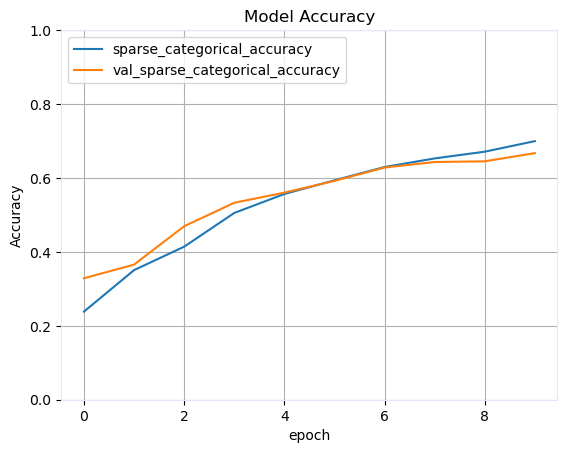

In [344]:
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('epoch')

plt.legend(['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy'], loc='upper left')

plt.show()

In [345]:
test_loss, test_acc = model.evaluate(X_valid,  y_valid, verbose=2)
print(f'Loss: {test_loss}')
print(f'Accuracy: {test_acc}')

469/469 - 8s - loss: 0.9416 - sparse_categorical_accuracy: 0.6672 - 8s/epoch - 17ms/step
Loss: 0.9415503144264221
Accuracy: 0.6672000288963318


In [346]:
from IPython import display
from PIL import Image


import numpy as np

# pegando uma imagem da internet para Validar o Modelo

url (https://cdn.auckland.ac.nz/aem/content/auckland/en/education/about-the-faculty/facilities/car-parking/jcr:content/leftpar/imagecomponent/image.img.1024.medium.jpg/1539642515007.jpg)

Image size:(576, 1024, 3)


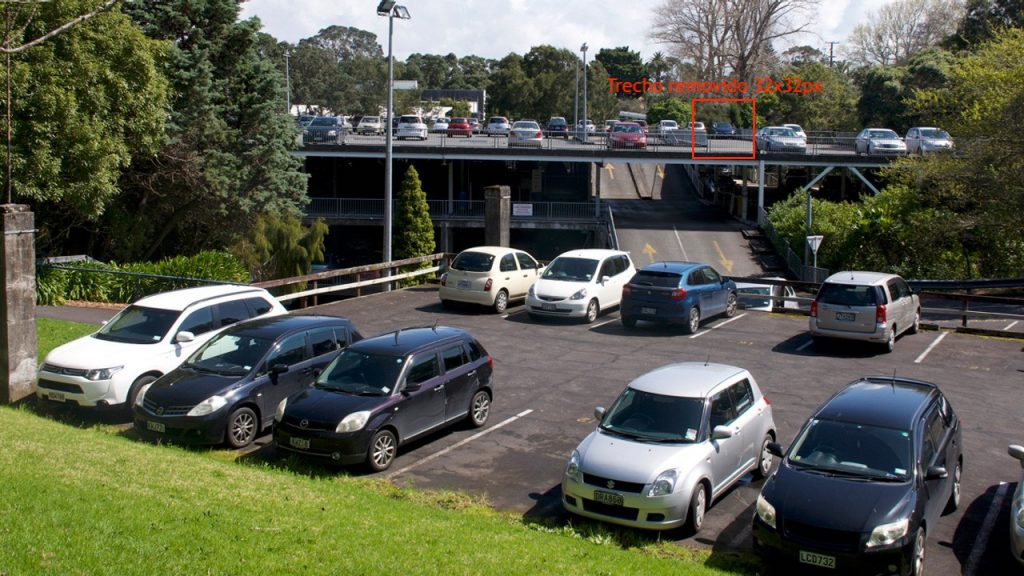

In [347]:
img_origin = '/Users/semicheche/Redes neurais/img_original.jpeg'

with open(img_origin, 'rb') as f:
    np_image_string = np.array([f.read()])

image = Image.open(img_origin)

width, height = image.size

# Convert the image data into a NumPy array
np_image = np.array(image.getdata()).reshape(height, width, 3).astype(np.uint8)

print(f'Image size:{np_image.shape}')


display.display(display.Image(img_origin, width=1024))

Image size:(32, 32, 3)


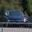

In [348]:

image_name = '/Users/semicheche/Redes neurais/cars.jpeg'

with open(image_name, 'rb') as f:
    np_image_string = np.array([f.read()])

image = Image.open(image_name)

width, height = image.size

# Convert the image data into a NumPy array
np_image = np.array(image.getdata()).reshape(height, width, 3).astype(np.uint8)

print(f'Image size:{np_image.shape}')


display.display(display.Image(image_name, width=320))

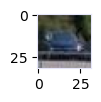

In [349]:
fig = plt.figure(figsize=(0.7, 0.7))
fig = plt.imshow(np_image, cmap=plt.cm.gray)
plt.show()

### Por algum motivo o tensorflow reclamou e foi preciso adicionar mais um dimensão a imagem

In [350]:
import tensorflow as tf
image_data = tf.expand_dims(np_image, axis=0)
print(image_data.shape)
print(image_data)

(1, 32, 32, 3)
tf.Tensor(
[[[[ 54  48  32]
   [ 69  63  47]
   [ 80  74  58]
   ...
   [ 72  87  58]
   [ 67  81  48]
   [ 66  80  45]]

  [[ 60  55  36]
   [ 75  70  51]
   [ 86  81  62]
   ...
   [ 69  84  55]
   [ 67  81  48]
   [ 66  80  45]]

  [[ 53  51  30]
   [ 67  65  44]
   [ 80  78  57]
   ...
   [ 66  81  52]
   [ 64  78  45]
   [ 58  72  37]]

  ...

  [[161 166 172]
   [135 140 146]
   [103 104 109]
   ...
   [154 152 157]
   [170 165 171]
   [153 151 156]]

  [[167 172 178]
   [142 147 153]
   [112 113 118]
   ...
   [157 152 156]
   [169 163 167]
   [156 151 155]]

  [[144 149 155]
   [129 134 140]
   [115 116 121]
   ...
   [164 158 162]
   [165 159 163]
   [159 153 157]]]], shape=(1, 32, 32, 3), dtype=uint8)


### Normalizando os dados

In [351]:
image_data = tf.divide(image_data, tf.reduce_max(image_data))
image_data

<tf.Tensor: shape=(1, 32, 32, 3), dtype=float32, numpy=
array([[[[0.24215247, 0.21524663, 0.14349777],
         [0.30941704, 0.2825112 , 0.21076234],
         [0.35874438, 0.33183858, 0.2600897 ],
         ...,
         [0.32286996, 0.39013454, 0.2600897 ],
         [0.30044842, 0.3632287 , 0.21524663],
         [0.29596412, 0.35874438, 0.20179372]],

        [[0.2690583 , 0.24663678, 0.16143498],
         [0.33632287, 0.31390134, 0.22869955],
         [0.38565022, 0.3632287 , 0.2780269 ],
         ...,
         [0.30941704, 0.37668163, 0.24663678],
         [0.30044842, 0.3632287 , 0.21524663],
         [0.29596412, 0.35874438, 0.20179372]],

        [[0.23766816, 0.22869955, 0.13452914],
         [0.30044842, 0.29147983, 0.19730942],
         [0.35874438, 0.3497758 , 0.25560537],
         ...,
         [0.29596412, 0.3632287 , 0.23318386],
         [0.28699553, 0.3497758 , 0.20179372],
         [0.2600897 , 0.32286996, 0.16591929]],

        ...,

        [[0.7219731 , 0.7443946 , 0.

### Fazendo a predição da imagem

In [352]:

y_proba = model.predict(image_data)

print(f'Probability scores:\n {y_proba.round(2)}')
print(f'Resultado: {class_names[y_proba.argmax()]}')

1/1 [==============================] - 0s 213ms/step
Probability scores:
 [[0.06 0.78 0.07 0.   0.   0.   0.02 0.   0.01 0.05]]
Resultado: automobile


# Conclusão

Com o modelo testado conseguimos uma acurracia de `66.7%` e testando nosso modelo com uma imagem retidada da internet obtivemos `78%` de acerttivade que e um automovel